In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')

In [2]:
L=420e-6
H=80e-6
Pe = 0.01
DO2 = 7.63596e-6
H = 80e-6
w=20e-6
U_0 = Pe*DO2/w
umax=1.5*U_0
Tref=773
rhof=4.4908
Mwf=0.02888
x_O2=0.22


In [7]:
def read(time=0.002,folder="reactiveThermalValidations_EulerImplicit",file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref):
    path=f"./{folder}/postProcessing/singleGraph/{str(time)}/{file}"
    df_dbs=pd.read_csv(path)
    df_norm_dbs=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
    if obj=="T":
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]/refValue
    else:
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]
    return df_norm_dbs

In [10]:
df_norm_dbs_EulerImplicit=read(folder="reactiveThermalValidations_EulerImplicit")
df_norm_dbs_2ndRK=read(folder="reactiveThermalValidations_2ndRK")
df_norm_dbs_4thRK=read(folder="reactiveThermalValidations_4thRK")
df_norm_dbs_4thRKFull=read(folder="reactiveThermalValidations_4thRKFull")

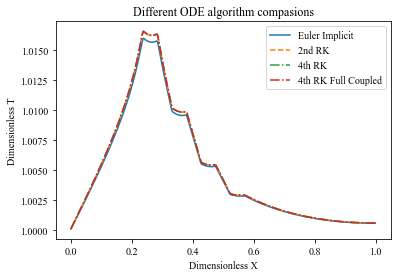

In [17]:
fig, ax = plt.subplots()
ax.plot(df_norm_dbs_EulerImplicit["NormalizedLength"],df_norm_dbs_EulerImplicit["NormalizedValue"],lineStyle="-",label="Euler Implicit")
ax.plot(df_norm_dbs_2ndRK["NormalizedLength"],df_norm_dbs_2ndRK["NormalizedValue"],lineStyle="--",label="2nd RK")
ax.plot(df_norm_dbs_4thRK["NormalizedLength"],df_norm_dbs_4thRK["NormalizedValue"],lineStyle="-.",label="4th RK")
ax.plot(df_norm_dbs_4thRKFull["NormalizedLength"],df_norm_dbs_4thRKFull["NormalizedValue"],lineStyle="-.",label="4th RK Full Coupled")
ax.set_xlabel(f"Dimensionless X")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Different ODE algorithm compasions")
ax.legend(loc="upper right")